In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import ast
from collections import Counter




In [2]:
d_movie = pd.read_csv('movie.metadata.tsv', delimiter='\t' , header=None)
d_movie.columns = ['Wikipedia movie ID',
'Freebase movie ID',
'Movie name',
'Movie release date',
'Movie box office revenue',
'Movie runtime',
'Movie languages',
'Movie countries',
'Movie genres']
d_movie.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
d_movie.shape

(81741, 9)

In [4]:
d_plot = pd.read_csv('plot_summaries.txt',  delimiter='\t', header=None)
d_plot.columns = ['Wikipedia movie ID','Plot']
#d_plot = d_plot.set_index('Wikipedia movie ID')
d_plot.head()

,Wikipedia movie ID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [5]:
ds = pd.merge(d_movie, d_plot,  how='inner' ,on='Wikipedia movie ID')

In [6]:
#Merge both dataset
dataset = pd.merge(d_movie, d_plot,  how='inner' ,on='Wikipedia movie ID')

In [7]:
dataset.shape

(42204, 10)

### Filter on box office not Nan

In [8]:
#Filter on box office not Nan
dataset = dataset.dropna(subset=['Movie box office revenue'])

In [9]:
dataset.shape

(7587, 10)

In [10]:
gen_list = []
for i in range(0,7587):
    gen_list.append(list(ast.literal_eval(d_movie['Movie genres'][i]).values()))

### Get the top ten Genres

In [11]:
#Get the top ten Genres
genre_list = [] #former gen_list_f
for i in range(len(gen_list)):
    for j in range(len(gen_list[i])):
        genre_list.append(gen_list[i][j])

In [12]:
len(gen_list)

7587

In [13]:
genre_list

['Thriller',
 'Science Fiction',
 'Horror',
 'Adventure',
 'Supernatural',
 'Action',
 'Space western',
 'Mystery',
 'Biographical film',
 'Drama',
 'Crime Drama',
 'Crime Fiction',
 'Drama',
 'Thriller',
 'Erotic thriller',
 'Psychological thriller',
 'Drama',
 'Short Film',
 'Silent film',
 'Indie',
 'Black-and-white',
 'Comedy',
 'Family Film',
 'Fantasy',
 'Adventure',
 'World cinema',
 'Musical',
 'Comedy',
 'Black-and-white',
 'Musical',
 'Drama',
 'Comedy',
 'Horror',
 'Supernatural',
 'Drama',
 'Black-and-white',
 'Crime Fiction',
 'Thriller',
 'Japanese Movies',
 'World cinema',
 'Action/Adventure',
 'Romantic comedy',
 'Ensemble Film',
 'Comedy-drama',
 'Drama',
 'Comedy',
 'Romantic drama',
 'Romance Film',
 'Costume drama',
 'War film',
 'Epic',
 'Period piece',
 'Drama',
 'Film adaptation',
 'Comedy',
 'Science Fiction',
 'Adventure',
 'Animation',
 'Short Film',
 'Fantasy',
 'Family Film',
 'Action',
 'Drama',
 "Children's/Family",
 'Musical',
 'Fantasy',
 'Comedy',
 'Dra

In [14]:
words_except_stop_dist = nltk.FreqDist(w for w in genre_list)

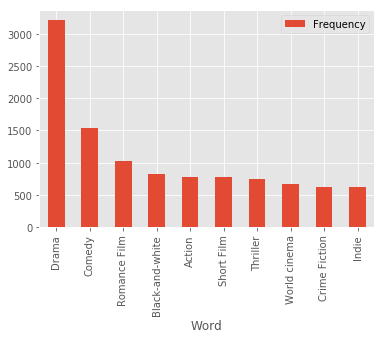

In [15]:
result = pd.DataFrame(words_except_stop_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')


matplotlib.style.use('ggplot')

result.plot.bar()
plt.show()